In [1]:
import pandas as pd
from pathlib import *
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import numpy as np
import itertools
#from arcgis.features import GeoAccessor, GeoSeriesAccessor
from scipy.stats import pearsonr
#import geopandas as gpd
import seaborn as sns
#from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib.pyplot import text
import pathlib
#import statsmodels.api as sm
#sns.set_theme()
import json
import glob
import dask.dataframe as dd
import datatable as dt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#path with SafeGraph patterns dataset
folder_2019_2020=Path(r'agile\2019_2020FLCA')
folder_2019_2020

WindowsPath('D:/Safegraph_inno/agile/2019_2020FLCA')

In [3]:
%%time
#read files in the folder 2019 at once
dfs = {f.stem: pd.read_csv(f) for f in folder_2019_2020.glob('*.csv')}
#dfs

Wall time: 21.6 s


In [4]:
%%time
#read all files and assign them to
#assign variable names to be the same as file names
for name, df in dfs.items():
    locals()[name] = df

Wall time: 0 ns


In [5]:
%%time
#combine data frames
df_2019_2020 = pd.concat([wk1_2019, wk2_2019, wk3_2019,wk4_2019, wk5_2019,wk6_2019, wk7_2019, wk8_2019, wk9_2019,
                          wk1_2020, wk2_2020, wk3_2020,wk4_2020, wk5_2020,wk6_2020, wk7_2020, wk8_2020, wk9_2020],
                            axis=0)
df_2019_2020.head()

Wall time: 1.23 s


,Unnamed: 0,placekey,location_name,top_category,sub_category,latitude,longitude,region,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,distance_from_home
0,8,223-225@8fw-25t-rrk,New Jerusalem P B Church,Religious Organizations,Religious Organizations,25.853776,-80.211400,FL,2019-03-04T00:00:00-05:00,2019-03-11T00:00:00-04:00,7.0,5.0,"[0,1,1,0,1,0,4]",2727.0
1,84,222-222@8gj-zs4-fvf,Bill Byrd KIA,Automobile Dealers,New Car Dealers,30.175513,-85.629256,FL,2019-03-04T00:00:00-06:00,2019-03-11T00:00:00-05:00,154.0,77.0,"[27,31,19,32,22,20,3]",14465.0
2,101,225-222@5vh-s95-xnq,Bethel Full Gospel Fellowship,Religious Organizations,Religious Organizations,38.007526,-121.356627,CA,2019-03-04T00:00:00-08:00,2019-03-11T00:00:00-07:00,50.0,15.0,"[3,7,5,8,9,9,9]",3274.0
3,104,229-222@5z5-3pn-x5z,Kaban Persian Restaurant,Restaurants and Other Eating Places,Full-Service Restaurants,34.129896,-118.348719,CA,2019-03-04T00:00:00-08:00,2019-03-11T00:00:00-07:00,12.0,12.0,"[1,1,0,2,5,2,1]",7384.0
4,137,222-224@8gq-wff-7qz,The Tire Choice & Total Car Care,"Automotive Parts, Accessories, and Tire Stores",Tire Dealers,29.212215,-81.024190,FL,2019-03-04T00:00:00-05:00,2019-03-11T00:00:00-04:00,40.0,20.0,"[6,8,7,10,8,1,0]",11974.0


In [6]:
df_2019_2020_FL= df_2019_2020.query('region =="FL"')
df_2019_2020_FL

,Unnamed: 0,placekey,location_name,top_category,sub_category,latitude,longitude,region,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,distance_from_home
0,8,223-225@8fw-25t-rrk,New Jerusalem P B Church,Religious Organizations,Religious Organizations,25.853776,-80.211400,FL,2019-03-04T00:00:00-05:00,2019-03-11T00:00:00-04:00,7.0,5.0,"[0,1,1,0,1,0,4]",2727.0
1,84,222-222@8gj-zs4-fvf,Bill Byrd KIA,Automobile Dealers,New Car Dealers,30.175513,-85.629256,FL,2019-03-04T00:00:00-06:00,2019-03-11T00:00:00-05:00,154.0,77.0,"[27,31,19,32,22,20,3]",14465.0
4,137,222-224@8gq-wff-7qz,The Tire Choice & Total Car Care,"Automotive Parts, Accessories, and Tire Stores",Tire Dealers,29.212215,-81.024190,FL,2019-03-04T00:00:00-05:00,2019-03-11T00:00:00-04:00,40.0,20.0,"[6,8,7,10,8,1,0]",11974.0
6,174,222-222@8fw-6sj-mff,West Broward Community Church,Religious Organizations,Religious Organizations,26.061143,-80.388763,FL,2019-03-04T00:00:00-05:00,2019-03-11T00:00:00-04:00,8.0,8.0,"[0,0,6,2,0,0,0]",8452.0
9,253,222-222@8dj-mz6-m6k,North Brandon Family Ymca,Individual and Family Services,Other Individual and Family Services,27.966488,-82.278596,FL,2019-03-04T00:00:00-05:00,2019-03-11T00:00:00-04:00,96.0,65.0,"[13,17,22,18,17,7,2]",6259.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384656,12891179,223-222@8fy-8dt-8y9,Al's Original Pizza,Restaurants and Other Eating Places,Full-Service Restaurants,28.382874,-81.404086,FL,2020-04-27T00:00:00-04:00,2020-05-04T00:00:00-04:00,17.0,17.0,"[2,5,2,5,1,0,2]",2280.0
384657,12891231,223-222@8fy-832-kj9,Medical Injury Care Provider Network,Offices of Other Health Practitioners,"Offices of Physical, Occupational and Speech T...",28.553178,-81.403909,FL,2020-04-27T00:00:00-04:00,2020-05-04T00:00:00-04:00,11.0,7.0,"[3,1,4,2,0,1,0]",13666.0
384662,12891567,223-222@8fy-2r2-xkf,Audiohouse Custom Electronics Design & Install...,Electronics and Appliance Stores,Electronics Stores,27.638616,-80.384790,FL,2020-04-27T00:00:00-04:00,2020-05-04T00:00:00-04:00,10.0,8.0,"[1,2,2,2,2,1,0]",5534.0
384671,12892033,222-222@8f4-5vd-zvf,Scenic Hills Church Of Christ,Religious Organizations,Religious Organizations,30.531957,-87.238617,FL,2020-04-27T00:00:00-05:00,2020-05-04T00:00:00-05:00,17.0,9.0,"[2,5,2,5,2,0,1]",14728.0


In [7]:
#categories with atleast 100 POIs in top category

df_2019_2020_categories=df_2019_2020_FL.groupby('top_category')['location_name'].count()
categories_over100=df_2019_2020_categories[df_2019_2020_categories>=50]
#df_2019_categories #182 categories
categories_over100.sort_values(ascending=False)

top_category
Restaurants and Other Eating Places                                742514
Religious Organizations                                            193742
Other Amusement and Recreation Industries                          174045
Museums, Historical Sites, and Similar Institutions                126322
Gasoline Stations                                                  120810
                                                                    ...  
Securities and Commodity Contracts Intermediation and Brokerage        65
Waste Collection                                                       64
Social Advocacy Organizations                                          57
Motor Vehicle Manufacturing                                            54
Investigation and Security Services                                    51
Name: location_name, Length: 148, dtype: int64

In [8]:
#Social Advocacy Organizations is missing data in week 6
categories_over1001 = categories_over100.drop(labels = ['Social Advocacy Organizations']) 
categories_over1001.sort_values(ascending=False)

top_category
Restaurants and Other Eating Places                                742514
Religious Organizations                                            193742
Other Amusement and Recreation Industries                          174045
Museums, Historical Sites, and Similar Institutions                126322
Gasoline Stations                                                  120810
                                                                    ...  
Deep Sea, Coastal, and Great Lakes Water Transportation                72
Securities and Commodity Contracts Intermediation and Brokerage        65
Waste Collection                                                       64
Motor Vehicle Manufacturing                                            54
Investigation and Security Services                                    51
Name: location_name, Length: 147, dtype: int64

In [9]:
names_array=categories_over1001.index
names_array.sort_values(ascending=True)

Index(['Accounting, Tax Preparation, Bookkeeping, and Payroll Services',
       'Activities Related to Credit Intermediation',
       'Activities Related to Real Estate',
       'Administration of Economic Programs',
       'Administration of Human Resource Programs',
       'Agencies, Brokerages, and Other Insurance Related Activities',
       'Amusement Parks and Arcades',
       'Apparel Accessories and Other Apparel Manufacturing',
       'Automobile Dealers', 'Automotive Equipment Rental and Leasing',
       ...
       'Taxi and Limousine Service', 'Technical and Trade Schools',
       'Travel Arrangement and Reservation Services', 'Traveler Accommodation',
       'Used Merchandise Stores', 'Utility System Construction',
       'Warehousing and Storage', 'Waste Collection',
       'Waste Treatment and Disposal',
       'Wired and Wireless Telecommunications Carriers'],
      dtype='object', name='top_category', length=147)

In [10]:
wk1_2019_FL=wk1_2019.query('top_category in @names_array and region =="FL"')
wk2_2019_FL=wk2_2019.query('top_category in @names_array and region =="FL"')
wk3_2019_FL=wk3_2019.query('top_category in @names_array and region =="FL"')
wk4_2019_FL=wk4_2019.query('top_category in @names_array and region =="FL"')
wk5_2019_FL=wk5_2019.query('top_category in @names_array and region =="FL"')
wk6_2019_FL=wk6_2019.query('top_category in @names_array and region =="FL"')
wk7_2019_FL=wk7_2019.query('top_category in @names_array and region =="FL"')
wk8_2019_FL=wk8_2019.query('top_category in @names_array and region =="FL"')
wk9_2019_FL=wk9_2019.query('top_category in @names_array and region =="FL"')

wk1_2020_FL=wk1_2020.query('top_category in @names_array and region =="FL"')
wk2_2020_FL=wk2_2020.query('top_category in @names_array and region =="FL"')
wk3_2020_FL=wk3_2020.query('top_category in @names_array and region =="FL"')
wk4_2020_FL=wk4_2020.query('top_category in @names_array and region =="FL"')
wk5_2020_FL=wk5_2020.query('top_category in @names_array and region =="FL"')
wk6_2020_FL=wk6_2020.query('top_category in @names_array and region =="FL"')
wk7_2020_FL=wk7_2020.query('top_category in @names_array and region =="FL"')
wk8_2020_FL=wk8_2020.query('top_category in @names_array and region =="FL"')
wk9_2020_FL=wk9_2020.query('top_category in @names_array and region =="FL"')
wk1_2019_FL

,Unnamed: 0,placekey,location_name,top_category,sub_category,latitude,longitude,region,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,distance_from_home
0,8,223-225@8fw-25t-rrk,New Jerusalem P B Church,Religious Organizations,Religious Organizations,25.853776,-80.211400,FL,2019-03-04T00:00:00-05:00,2019-03-11T00:00:00-04:00,7.0,5.0,"[0,1,1,0,1,0,4]",2727.0
1,84,222-222@8gj-zs4-fvf,Bill Byrd KIA,Automobile Dealers,New Car Dealers,30.175513,-85.629256,FL,2019-03-04T00:00:00-06:00,2019-03-11T00:00:00-05:00,154.0,77.0,"[27,31,19,32,22,20,3]",14465.0
4,137,222-224@8gq-wff-7qz,The Tire Choice & Total Car Care,"Automotive Parts, Accessories, and Tire Stores",Tire Dealers,29.212215,-81.024190,FL,2019-03-04T00:00:00-05:00,2019-03-11T00:00:00-04:00,40.0,20.0,"[6,8,7,10,8,1,0]",11974.0
6,174,222-222@8fw-6sj-mff,West Broward Community Church,Religious Organizations,Religious Organizations,26.061143,-80.388763,FL,2019-03-04T00:00:00-05:00,2019-03-11T00:00:00-04:00,8.0,8.0,"[0,0,6,2,0,0,0]",8452.0
9,253,222-222@8dj-mz6-m6k,North Brandon Family Ymca,Individual and Family Services,Other Individual and Family Services,27.966488,-82.278596,FL,2019-03-04T00:00:00-05:00,2019-03-11T00:00:00-04:00,96.0,65.0,"[13,17,22,18,17,7,2]",6259.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543075,12891817,zzw-222@8gq-9bn-5mk,Optum Primary Care,Offices of Physicians,Offices of Physicians (except Mental Health Sp...,28.896918,-82.561767,FL,2019-03-04T00:00:00-05:00,2019-03-11T00:00:00-04:00,11.0,10.0,"[5,4,1,1,0,0,0]",15437.0
543084,12892004,222-222@8fw-6nx-9j9,Chase,Depository Credit Intermediation,Commercial Banking,25.981183,-80.278303,FL,2019-03-04T00:00:00-05:00,2019-03-11T00:00:00-04:00,69.0,56.0,"[16,8,7,8,12,16,2]",4154.0
543088,12892070,zzw-225@8fy-5y8-yjv,Tropical Smoothie Café,Restaurants and Other Eating Places,Snack and Nonalcoholic Beverage Bars,27.313860,-80.404787,FL,2019-03-04T00:00:00-05:00,2019-03-11T00:00:00-04:00,174.0,138.0,"[29,15,26,21,33,32,18]",7411.0
543089,12892117,225-224@8gk-4vj-wp9,Hot Head Burritos,Restaurants and Other Eating Places,Limited-Service Restaurants,30.418148,-86.652530,FL,2019-03-04T00:00:00-06:00,2019-03-11T00:00:00-05:00,10.0,9.0,"[0,1,1,5,3,0,0]",16813.0


In [11]:
from scipy.stats import shapiro
#if the p-value is 0.0001 which is less than the alpha(0.05) then we reject the null hypothesis i.e.
#we have sufficient evidence to say that sample does not come from a normal distribution. therefore ttest not appropiate
 
wk1_2019_shap=shapiro(wk1_2019_FL['distance_from_home'])[1]
wk1_2020_shap=shapiro(wk1_2020_FL['distance_from_home'])[1]
 
wk2_2019_shap=shapiro(wk2_2019_FL['distance_from_home'])[1]
wk2_2020_shap=shapiro(wk2_2020_FL['distance_from_home'])[1]

 
wk3_2019_shap=shapiro(wk3_2019_FL['distance_from_home'])[1]
wk3_2020_shap=shapiro(wk3_2020_FL['distance_from_home'])[1]
 
wk4_2019_shap=shapiro(wk4_2019_FL['distance_from_home'])[1]
wk4_2020_shap=shapiro(wk4_2020_FL['distance_from_home'])[1]
 
wk5_2019_shap=shapiro(wk5_2019_FL['distance_from_home'])[1]
wk5_2020_shap=shapiro(wk5_2020_FL['distance_from_home'])[1]
 
wk6_2019_shap=shapiro(wk6_2019_FL['distance_from_home'])[1]
wk6_2020_shap=shapiro(wk6_2020_FL['distance_from_home'])[1]
 
wk7_2019_shap=shapiro(wk7_2019_FL['distance_from_home'])[1]
wk7_2020_shap=shapiro(wk7_2020_FL['distance_from_home'])[1]
 
wk8_2019_shap=shapiro(wk8_2019_FL['distance_from_home'])[1]
wk8_2020_shap=shapiro(wk8_2020_FL['distance_from_home'])[1]
 
wk9_2019_shap=shapiro(wk9_2019_FL['distance_from_home'])[1]
wk9_2020_shap=shapiro(wk9_2020_FL['distance_from_home'])[1]



print('Wk1_19=',wk1_2019_shap, '\n',"Wk1_20=",wk1_2020_shap, '\n', "Wk2_19=",wk2_2019_shap, '\n',
     'Wk2_20=',wk2_2020_shap, '\n',"Wk3_19=",wk3_2019_shap, '\n', "Wk3_20=",wk3_2020_shap, '\n',
     'Wk4_19=',wk4_2019_shap, '\n',"Wk4_20=",wk4_2020_shap, '\n', "Wk5_19=",wk5_2019_shap,'\n'
     'Wk5_20=',wk5_2020_shap, '\n',"Wk6_19=",wk6_2019_shap, '\n', "Wk6_20=",wk6_2020_shap, '\n'
     'Wk7_19=',wk7_2019_shap, '\n',"Wk7_20=",wk7_2020_shap, '\n', "Wk8_19=",wk8_2019_shap, '\n'
     'Wk8_20=',wk8_2020_shap, '\n',"Wk9_19=",wk9_2019_shap, '\n', "Wk9_20=",wk9_2020_shap)

Wk1_19= 0.0 
 Wk1_20= 0.0 
 Wk2_19= 0.0 
 Wk2_20= 0.0 
 Wk3_19= 0.0 
 Wk3_20= 0.0 
 Wk4_19= 0.0 
 Wk4_20= 0.0 
 Wk5_19= 0.0 
Wk5_20= 0.0 
 Wk6_19= 0.0 
 Wk6_20= 0.0 
Wk7_19= 0.0 
 Wk7_20= 0.0 
 Wk8_19= 0.0 
Wk8_20= 0.0 
 Wk9_19= 0.0 
 Wk9_20= 0.0


In [13]:
from scipy.stats import levene
#if the p-value is 0.0001 which is less than the alpha(0.05) then we reject the null hypothesis i.e.
#we have sufficient evidence to say that sample does not come from a normal distribution, that is variance are not
#equal. therefore ttest not appropiate
wk1=levene(wk1_2019_FL['distance_from_home'], wk1_2020_FL['distance_from_home'])
wk2=levene(wk2_2019_FL['distance_from_home'], wk2_2020_FL['distance_from_home'])
wk3=levene(wk3_2019_FL['distance_from_home'], wk3_2020_FL['distance_from_home'])
wk4=levene(wk4_2019_FL['distance_from_home'], wk4_2020_FL['distance_from_home'])

wk5=levene(wk5_2019_FL['distance_from_home'], wk5_2020_FL['distance_from_home'])
wk6=levene(wk6_2019_FL['distance_from_home'], wk6_2020_FL['distance_from_home'])
wk7=levene(wk7_2019_FL['distance_from_home'], wk7_2020_FL['distance_from_home'])
wk8=levene(wk8_2019_FL['distance_from_home'], wk8_2020_FL['distance_from_home'])

wk9=levene(wk9_2019_FL['distance_from_home'], wk9_2020_FL['distance_from_home'])

print('Wk1=',wk1, '\n',"Wk2=",wk2, '\n', "Wk3=",wk3, '\n',
     'Wk4=',wk4, '\n',"Wk5=",wk5, '\n', "Wk6=",wk6, '\n'
     'Wk7=',wk7, '\n',"Wk8=",wk8, '\n', "Wk9=",wk9)


Wk1= LeveneResult(statistic=144.81596148813165, pvalue=2.3872506340184026e-33) 
 Wk2= LeveneResult(statistic=115.84882717131664, pvalue=5.173662329606458e-27) 
 Wk3= LeveneResult(statistic=3.9950694857850064, pvalue=0.04563429320203576) 
 Wk4= LeveneResult(statistic=2235.323018588659, pvalue=0.0) 
 Wk5= LeveneResult(statistic=3776.5701104062764, pvalue=0.0) 
 Wk6= LeveneResult(statistic=1930.8708760342854, pvalue=0.0) 
Wk7= LeveneResult(statistic=3137.794567302609, pvalue=0.0) 
 Wk8= LeveneResult(statistic=2781.9591361925654, pvalue=0.0) 
 Wk9= LeveneResult(statistic=1594.056939921408, pvalue=0.0)


In [14]:
from scipy.stats import ttest_ind
#T-tests are parametric tests:independent and continuous, normally distributed, 
# randomly sampled equal variance in the grps
#A t-statistic close to zero represents the lowest evidence against the hypothesis.  
#A larger t-statistic value represents strong evidence against the hypothesis.
wk1=ttest_ind(wk1_2019_FL['distance_from_home'], wk1_2020_FL['distance_from_home'])
wk2=ttest_ind(wk2_2019_FL['distance_from_home'], wk2_2020_FL['distance_from_home'])
wk3=ttest_ind(wk3_2019_FL['distance_from_home'], wk3_2020_FL['distance_from_home'])
wk4=ttest_ind(wk4_2019_FL['distance_from_home'], wk4_2020_FL['distance_from_home'])

wk5=ttest_ind(wk5_2019_FL['distance_from_home'], wk5_2020_FL['distance_from_home'])
wk6=ttest_ind(wk6_2019_FL['distance_from_home'], wk6_2020_FL['distance_from_home'])
wk7=ttest_ind(wk7_2019_FL['distance_from_home'], wk7_2020_FL['distance_from_home'])
wk8=ttest_ind(wk8_2019_FL['distance_from_home'], wk8_2020_FL['distance_from_home'])

wk9=ttest_ind(wk9_2019_FL['distance_from_home'], wk9_2020_FL['distance_from_home'])

print('Wk1=',wk1, '\n',"Wk2=",wk2, '\n', "Wk3=",wk3, '\n',
     'Wk4=',wk4, '\n',"Wk5=",wk5, '\n', "Wk6=",wk6, '\n'
     'Wk7=',wk7, '\n',"Wk8=",wk8, '\n', "Wk9=",wk9)

Wk1= Ttest_indResult(statistic=-11.968332188758854, pvalue=5.2737811558612475e-33) 
 Wk2= Ttest_indResult(statistic=-10.507946217009296, pvalue=8.002605401908166e-26) 
 Wk3= Ttest_indResult(statistic=2.6683163687873726, pvalue=0.007623572396384632) 
 Wk4= Ttest_indResult(statistic=47.29252556806172, pvalue=0.0) 
 Wk5= Ttest_indResult(statistic=63.85935892329856, pvalue=0.0) 
 Wk6= Ttest_indResult(statistic=46.40495956384846, pvalue=0.0) 
Wk7= Ttest_indResult(statistic=57.74265698724891, pvalue=0.0) 
 Wk8= Ttest_indResult(statistic=54.18031873917611, pvalue=0.0) 
 Wk9= Ttest_indResult(statistic=42.16750367964894, pvalue=0.0)


In [15]:
#used when sample sizes vary between two groups, non-parametric test that can be used in place of an unpaired t-test.
#H0: The weighted_dist is equal between the two groups
#HA: The weighted_dist is not equal between the two groups
#If the p-value is less than 0.05, then the weighted_dist are different and H0 is reject
#IF p<0.05= medians are significantly different from each other 

#A one-tailed test looks for an “increase” or “decrease” in the parameter 
#whereas a two-tailed test looks for a “change” (could be increase or decrease) in the parameter.


from scipy.stats import mannwhitneyu
wk1=mannwhitneyu(wk1_2019_FL['distance_from_home'], wk1_2020_FL['distance_from_home'],alternative='two-sided')
wk2=mannwhitneyu(wk2_2019_FL['distance_from_home'], wk2_2020_FL['distance_from_home'],alternative='two-sided')
wk3=mannwhitneyu(wk3_2019_FL['distance_from_home'], wk3_2020_FL['distance_from_home'],alternative='two-sided')
wk4=mannwhitneyu(wk4_2019_FL['distance_from_home'], wk4_2020_FL['distance_from_home'],alternative='two-sided')

wk5=mannwhitneyu(wk5_2019_FL['distance_from_home'], wk5_2020_FL['distance_from_home'],alternative='two-sided')
wk6=mannwhitneyu(wk6_2019_FL['distance_from_home'], wk6_2020_FL['distance_from_home'],alternative='two-sided')
wk7=mannwhitneyu(wk7_2019_FL['distance_from_home'], wk7_2020_FL['distance_from_home'],alternative='two-sided')
wk8=mannwhitneyu(wk8_2019_FL['distance_from_home'], wk8_2020_FL['distance_from_home'],alternative='two-sided')

wk9=mannwhitneyu(wk9_2019_FL['distance_from_home'], wk9_2020_FL['distance_from_home'],alternative='two-sided')


print('Wk1=',wk1, '\n',"Wk2=",wk2, '\n', "Wk3=",wk3, '\n',
     'Wk4=',wk4, '\n',"Wk5=",wk5, '\n', "Wk6=",wk6, '\n'
     'Wk7=',wk7, '\n',"Wk8=",wk8, '\n', "Wk9=",wk9)

Wk1= MannwhitneyuResult(statistic=20297299029.0, pvalue=9.737681417009732e-06) 
 Wk2= MannwhitneyuResult(statistic=19897722711.5, pvalue=2.7334346090634966e-06) 
 Wk3= MannwhitneyuResult(statistic=18065879829.5, pvalue=9.591575023678272e-102) 
 Wk4= MannwhitneyuResult(statistic=16587180634.0, pvalue=2.0725674535682709e-22) 
 Wk5= MannwhitneyuResult(statistic=18449117671.0, pvalue=0.0) 
 Wk6= MannwhitneyuResult(statistic=16414547592.0, pvalue=0.0) 
Wk7= MannwhitneyuResult(statistic=15727371075.0, pvalue=0.0) 
 Wk8= MannwhitneyuResult(statistic=16205554924.0, pvalue=0.0) 
 Wk9= MannwhitneyuResult(statistic=18123225927.5, pvalue=0.0)


In [16]:
#‘less’: the distribution underlying weighted_dist 2019 is 
#stochastically less than the distribution weghted_dist 2020.
# if p<0.005, means that weighted_dist 2019 is significantly less than the genotype weghted_dist 2020.

from scipy.stats import mannwhitneyu
wk1=mannwhitneyu(wk1_2019_FL['distance_from_home'], wk1_2020_FL['distance_from_home'],alternative='less')
wk2=mannwhitneyu(wk2_2019_FL['distance_from_home'], wk2_2020_FL['distance_from_home'],alternative='less')
wk3=mannwhitneyu(wk3_2019_FL['distance_from_home'], wk3_2020_FL['distance_from_home'],alternative='less')
wk4=mannwhitneyu(wk4_2019_FL['distance_from_home'], wk4_2020_FL['distance_from_home'],alternative='less')

wk5=mannwhitneyu(wk5_2019_FL['distance_from_home'], wk5_2020_FL['distance_from_home'],alternative='less')
wk6=mannwhitneyu(wk6_2019_FL['distance_from_home'], wk6_2020_FL['distance_from_home'],alternative='less')
wk7=mannwhitneyu(wk7_2019_FL['distance_from_home'], wk7_2020_FL['distance_from_home'],alternative='less')
wk8=mannwhitneyu(wk8_2019_FL['distance_from_home'], wk8_2020_FL['distance_from_home'],alternative='less')

wk9=mannwhitneyu(wk9_2019_FL['distance_from_home'], wk9_2020_FL['distance_from_home'],alternative='less')


print('Wk1=',wk1, '\n',"Wk2=",wk2, '\n', "Wk3=",wk3, '\n',
     'Wk4=',wk4, '\n',"Wk5=",wk5, '\n', "Wk6=",wk6, '\n'
     'Wk7=',wk7, '\n',"Wk8=",wk8, '\n', "Wk9=",wk9)

Wk1= MannwhitneyuResult(statistic=20297299029.0, pvalue=4.868840708504866e-06) 
 Wk2= MannwhitneyuResult(statistic=19897722711.5, pvalue=0.9999986332828802) 
 Wk3= MannwhitneyuResult(statistic=18065879829.5, pvalue=1.0) 
 Wk4= MannwhitneyuResult(statistic=16587180634.0, pvalue=1.0) 
 Wk5= MannwhitneyuResult(statistic=18449117671.0, pvalue=1.0) 
 Wk6= MannwhitneyuResult(statistic=16414547592.0, pvalue=1.0) 
Wk7= MannwhitneyuResult(statistic=15727371075.0, pvalue=1.0) 
 Wk8= MannwhitneyuResult(statistic=16205554924.0, pvalue=1.0) 
 Wk9= MannwhitneyuResult(statistic=18123225927.5, pvalue=1.0)


In [17]:
#‘less’: the distribution underlying weighted_dist 2019 is 
#stochastically less than the distribution weghted_dist 2020.
# if p<0.005, means that weighted_dist 2019 is significantly less than the genotype weghted_dist 2020.

from scipy.stats import mannwhitneyu
wk1=mannwhitneyu(wk1_2019_FL['distance_from_home'], wk1_2020_FL['distance_from_home'],alternative='greater')
wk2=mannwhitneyu(wk2_2019_FL['distance_from_home'], wk2_2020_FL['distance_from_home'],alternative='greater')
wk3=mannwhitneyu(wk3_2019_FL['distance_from_home'], wk3_2020_FL['distance_from_home'],alternative='greater')
wk4=mannwhitneyu(wk4_2019_FL['distance_from_home'], wk4_2020_FL['distance_from_home'],alternative='greater')

wk5=mannwhitneyu(wk5_2019_FL['distance_from_home'], wk5_2020_FL['distance_from_home'],alternative='greater')
wk6=mannwhitneyu(wk6_2019_FL['distance_from_home'], wk6_2020_FL['distance_from_home'],alternative='greater')
wk7=mannwhitneyu(wk7_2019_FL['distance_from_home'], wk7_2020_FL['distance_from_home'],alternative='greater')
wk8=mannwhitneyu(wk8_2019_FL['distance_from_home'], wk8_2020_FL['distance_from_home'],alternative='greater')

wk9=mannwhitneyu(wk9_2019_FL['distance_from_home'], wk9_2020_FL['distance_from_home'],alternative='greater')


print('Wk1=',wk1, '\n',"Wk2=",wk2, '\n', "Wk3=",wk3, '\n',
     'Wk4=',wk4, '\n',"Wk5=",wk5, '\n', "Wk6=",wk6, '\n'
     'Wk7=',wk7, '\n',"Wk8=",wk8, '\n', "Wk9=",wk9)

Wk1= MannwhitneyuResult(statistic=20297299029.0, pvalue=0.9999951311598982) 
 Wk2= MannwhitneyuResult(statistic=19897722711.5, pvalue=1.3667173045317483e-06) 
 Wk3= MannwhitneyuResult(statistic=18065879829.5, pvalue=4.795787511839136e-102) 
 Wk4= MannwhitneyuResult(statistic=16587180634.0, pvalue=1.0362837267841354e-22) 
 Wk5= MannwhitneyuResult(statistic=18449117671.0, pvalue=0.0) 
 Wk6= MannwhitneyuResult(statistic=16414547592.0, pvalue=0.0) 
Wk7= MannwhitneyuResult(statistic=15727371075.0, pvalue=0.0) 
 Wk8= MannwhitneyuResult(statistic=16205554924.0, pvalue=0.0) 
 Wk9= MannwhitneyuResult(statistic=18123225927.5, pvalue=0.0)


In [18]:
for j in names_array:
    i=str(j)
    print(i)

Accounting, Tax Preparation, Bookkeeping, and Payroll Services
Activities Related to Credit Intermediation
Activities Related to Real Estate
Administration of Economic Programs
Administration of Human Resource Programs
Agencies, Brokerages, and Other Insurance Related Activities
Amusement Parks and Arcades
Apparel Accessories and Other Apparel Manufacturing
Automobile Dealers
Automotive Equipment Rental and Leasing
Automotive Parts, Accessories, and Tire Stores
Automotive Repair and Maintenance
Bakeries and Tortilla Manufacturing
Beer, Wine, and Liquor Stores
Beverage Manufacturing
Book Stores and News Dealers
Building Equipment Contractors
Building Finishing Contractors
Building Material and Supplies Dealers
Business Support Services
Cable and Other Subscription Programming
Chemical and Allied Products Merchant Wholesalers
Child Day Care Services
Civic and Social Organizations
Clay Product and Refractory Manufacturing
Clothing Stores
Coating, Engraving, Heat Treating, and Allied Activ

In [19]:
from scipy import stats
for j in names_array:
    i=str(j)
    print(i)
    #data.query(f'{x} == "a"') 
    #filtered_df = df.query(f'top_category == "{value}"')
    a1 = wk1_2019_FL.query('top_category == "{}"'.format(i))['distance_from_home']
    b1 = wk1_2020_FL.query('top_category == "{}"'.format(i))['distance_from_home']
    
    a2 = wk2_2019_FL.query('top_category == "{}"'.format(i))['distance_from_home']
    b2 = wk2_2020_FL.query('top_category == "{}"'.format(i))['distance_from_home']
    
    a3 = wk3_2019_FL.query('top_category == "{}"'.format(i))['distance_from_home']
    b3 = wk3_2020_FL.query('top_category == "{}"'.format(i))['distance_from_home']
    
    a4 = wk4_2019_FL.query('top_category == "{}"'.format(i))['distance_from_home']
    b4 = wk4_2020_FL.query('top_category == "{}"'.format(i))['distance_from_home']
    
    a5 = wk5_2019_FL.query('top_category == "{}"'.format(i))['distance_from_home']
    b5 = wk5_2020_FL.query('top_category == "{}"'.format(i))['distance_from_home']
    
    a6 = wk6_2019_FL.query('top_category == "{}"'.format(i))['distance_from_home']
    b6 = wk6_2020_FL.query('top_category == "{}"'.format(i))['distance_from_home']
    
    a7 = wk7_2019_FL.query('top_category == "{}"'.format(i))['distance_from_home']
    b7 = wk7_2020_FL.query('top_category == "{}"'.format(i))['distance_from_home']
    
    a8 = wk8_2019_FL.query('top_category == "{}"'.format(i))['distance_from_home']
    b8 = wk8_2020_FL.query('top_category == "{}"'.format(i))['distance_from_home']
    
    a9 = wk9_2019_FL.query('top_category == "{}"'.format(i))['distance_from_home']
    b9 = wk9_2020_FL.query('top_category == "{}"'.format(i))['distance_from_home']
    
    wk1 = stats.mannwhitneyu(a1, b1, alternative='greater')[1].round(2)
    
    wk2 = stats.mannwhitneyu(a2, b2, alternative='greater')[1].round(2)
    
    wk3 = stats.mannwhitneyu(a3, b3, alternative='greater')[1].round(2)
    
    wk4 = stats.mannwhitneyu(a4, b4, alternative='greater')[1].round(2)
    
    wk5 = stats.mannwhitneyu(a5, b5, alternative='greater')[1].round(2)
    
    wk6 = stats.mannwhitneyu(a6, b6, alternative='greater')[1].round(2)
    
    wk7 = stats.mannwhitneyu(a7, b7, alternative='greater')[1].round(2)
    
    wk8 = stats.mannwhitneyu(a8, b8, alternative='greater')[1].round(2)
    wk9 = stats.mannwhitneyu(a9, b9, alternative='greater')[1].round(2)
    
    print('Wk1=', wk1, '\n', "Wk2=", wk2, '\n', "Wk3=", wk3, '\n',
    'Wk4=', wk4, '\n', "Wk5=", wk5, '\n', "Wk6=", wk6, '\n'
    'Wk7=', wk7, '\n', "Wk8=", wk8, '\n', "Wk9=", wk9)
    weekdict = {}
    weeknum = ['wk1', 'wk2', 'wk3', 'wk4', 'wk5', 'wk6', 'wk7', 'wk8', 'wk9']
    weekres = [wk1, wk2, wk3, wk4, wk5, wk6, wk7, wk8, wk9]
    poi = i
    
    for key in weeknum:
        for value in weekres:
            weekdict[key] = value
            weekres.remove(value)
            break
    print(weekdict)
    weekdict['poi'] = poi
    #weekdict['one_tail_test'] = 'is2019greaterthan2020'

    df = pd.DataFrame.from_dict(weekdict, orient='index')
    df = df.transpose()

    df.to_csv(poi+'FL_dist_onetail_is2019greater.csv', index=False, encoding="utf-8")


Accounting, Tax Preparation, Bookkeeping, and Payroll Services
Wk1= 0.71 
 Wk2= 0.13 
 Wk3= 0.34 
 Wk4= 0.74 
 Wk5= 0.1 
 Wk6= 0.09 
Wk7= 0.04 
 Wk8= 0.6 
 Wk9= 0.44
{'wk1': 0.71, 'wk2': 0.13, 'wk3': 0.34, 'wk4': 0.74, 'wk5': 0.1, 'wk6': 0.09, 'wk7': 0.04, 'wk8': 0.6, 'wk9': 0.44}
Activities Related to Credit Intermediation
Wk1= 0.7 
 Wk2= 0.33 
 Wk3= 0.26 
 Wk4= 0.71 
 Wk5= 0.0 
 Wk6= 0.0 
Wk7= 0.02 
 Wk8= 0.0 
 Wk9= 0.0
{'wk1': 0.7, 'wk2': 0.33, 'wk3': 0.26, 'wk4': 0.71, 'wk5': 0.0, 'wk6': 0.0, 'wk7': 0.02, 'wk8': 0.0, 'wk9': 0.0}
Activities Related to Real Estate
Wk1= 0.41 
 Wk2= 0.01 
 Wk3= 0.11 
 Wk4= 0.96 
 Wk5= 0.0 
 Wk6= 0.0 
Wk7= 0.0 
 Wk8= 0.0 
 Wk9= 0.0
{'wk1': 0.41, 'wk2': 0.01, 'wk3': 0.11, 'wk4': 0.96, 'wk5': 0.0, 'wk6': 0.0, 'wk7': 0.0, 'wk8': 0.0, 'wk9': 0.0}
Administration of Economic Programs
Wk1= 0.8 
 Wk2= 0.04 
 Wk3= 0.53 
 Wk4= 0.99 
 Wk5= 0.64 
 Wk6= 0.51 
Wk7= 0.14 
 Wk8= 0.83 
 Wk9= 0.27
{'wk1': 0.8, 'wk2': 0.04, 'wk3': 0.53, 'wk4': 0.99, 'wk5': 0.64, 'wk6': 0.

Wk1= 0.12 
 Wk2= 0.11 
 Wk3= 0.74 
 Wk4= 0.38 
 Wk5= 0.0 
 Wk6= 0.0 
Wk7= 0.0 
 Wk8= 0.11 
 Wk9= 0.3
{'wk1': 0.12, 'wk2': 0.11, 'wk3': 0.74, 'wk4': 0.38, 'wk5': 0.0, 'wk6': 0.0, 'wk7': 0.0, 'wk8': 0.11, 'wk9': 0.3}
Deep Sea, Coastal, and Great Lakes Water Transportation
Wk1= 0.9 
 Wk2= 0.76 
 Wk3= 0.06 
 Wk4= 0.17 
 Wk5= 0.06 
 Wk6= 0.1 
Wk7= 0.44 
 Wk8= 0.17 
 Wk9= 0.01
{'wk1': 0.9, 'wk2': 0.76, 'wk3': 0.06, 'wk4': 0.17, 'wk5': 0.06, 'wk6': 0.1, 'wk7': 0.44, 'wk8': 0.17, 'wk9': 0.01}
Department Stores
Wk1= 0.43 
 Wk2= 0.62 
 Wk3= 0.02 
 Wk4= 0.0 
 Wk5= 0.0 
 Wk6= 0.0 
Wk7= 0.0 
 Wk8= 0.0 
 Wk9= 0.0
{'wk1': 0.43, 'wk2': 0.62, 'wk3': 0.02, 'wk4': 0.0, 'wk5': 0.0, 'wk6': 0.0, 'wk7': 0.0, 'wk8': 0.0, 'wk9': 0.0}
Depository Credit Intermediation
Wk1= 0.56 
 Wk2= 0.07 
 Wk3= 0.0 
 Wk4= 0.03 
 Wk5= 0.0 
 Wk6= 0.0 
Wk7= 0.0 
 Wk8= 0.0 
 Wk9= 0.0
{'wk1': 0.56, 'wk2': 0.07, 'wk3': 0.0, 'wk4': 0.03, 'wk5': 0.0, 'wk6': 0.0, 'wk7': 0.0, 'wk8': 0.0, 'wk9': 0.0}
Direct Selling Establishments
Wk1= 0.

Wk1= 0.97 
 Wk2= 0.97 
 Wk3= 0.98 
 Wk4= 0.98 
 Wk5= 0.96 
 Wk6= 0.81 
Wk7= 0.91 
 Wk8= 0.85 
 Wk9= 0.85
{'wk1': 0.97, 'wk2': 0.97, 'wk3': 0.98, 'wk4': 0.98, 'wk5': 0.96, 'wk6': 0.81, 'wk7': 0.91, 'wk8': 0.85, 'wk9': 0.85}
Individual and Family Services
Wk1= 0.33 
 Wk2= 0.29 
 Wk3= 0.25 
 Wk4= 0.97 
 Wk5= 0.11 
 Wk6= 0.3 
Wk7= 0.79 
 Wk8= 0.9 
 Wk9= 0.53
{'wk1': 0.33, 'wk2': 0.29, 'wk3': 0.25, 'wk4': 0.97, 'wk5': 0.11, 'wk6': 0.3, 'wk7': 0.79, 'wk8': 0.9, 'wk9': 0.53}
Insurance Carriers
Wk1= 0.85 
 Wk2= 0.6 
 Wk3= 0.09 
 Wk4= 0.04 
 Wk5= 0.01 
 Wk6= 0.73 
Wk7= 0.15 
 Wk8= 0.35 
 Wk9= 0.17
{'wk1': 0.85, 'wk2': 0.6, 'wk3': 0.09, 'wk4': 0.04, 'wk5': 0.01, 'wk6': 0.73, 'wk7': 0.15, 'wk8': 0.35, 'wk9': 0.17}
Interurban and Rural Bus Transportation
Wk1= 0.76 
 Wk2= 0.31 
 Wk3= 0.53 
 Wk4= 0.1 
 Wk5= 0.36 
 Wk6= 0.23 
Wk7= 0.27 
 Wk8= 0.4 
 Wk9= 0.31
{'wk1': 0.76, 'wk2': 0.31, 'wk3': 0.53, 'wk4': 0.1, 'wk5': 0.36, 'wk6': 0.23, 'wk7': 0.27, 'wk8': 0.4, 'wk9': 0.31}
Investigation and Security S

Wk1= 0.31 
 Wk2= 0.15 
 Wk3= 0.89 
 Wk4= 0.95 
 Wk5= 0.2 
 Wk6= 0.65 
Wk7= 0.7 
 Wk8= 0.3 
 Wk9= 0.53
{'wk1': 0.31, 'wk2': 0.15, 'wk3': 0.89, 'wk4': 0.95, 'wk5': 0.2, 'wk6': 0.65, 'wk7': 0.7, 'wk8': 0.3, 'wk9': 0.53}
Other Miscellaneous Store Retailers
Wk1= 0.69 
 Wk2= 0.2 
 Wk3= 0.0 
 Wk4= 0.0 
 Wk5= 0.0 
 Wk6= 0.0 
Wk7= 0.0 
 Wk8= 0.0 
 Wk9= 0.0
{'wk1': 0.69, 'wk2': 0.2, 'wk3': 0.0, 'wk4': 0.0, 'wk5': 0.0, 'wk6': 0.0, 'wk7': 0.0, 'wk8': 0.0, 'wk9': 0.0}
Other Motor Vehicle Dealers
Wk1= 0.99 
 Wk2= 0.74 
 Wk3= 0.68 
 Wk4= 1.0 
 Wk5= 0.0 
 Wk6= 0.08 
Wk7= 0.01 
 Wk8= 0.67 
 Wk9= 0.92
{'wk1': 0.99, 'wk2': 0.74, 'wk3': 0.68, 'wk4': 1.0, 'wk5': 0.0, 'wk6': 0.08, 'wk7': 0.01, 'wk8': 0.67, 'wk9': 0.92}
Other Personal Services
Wk1= 0.83 
 Wk2= 0.42 
 Wk3= 0.16 
 Wk4= 0.94 
 Wk5= 0.0 
 Wk6= 0.0 
Wk7= 0.0 
 Wk8= 0.0 
 Wk9= 0.0
{'wk1': 0.83, 'wk2': 0.42, 'wk3': 0.16, 'wk4': 0.94, 'wk5': 0.0, 'wk6': 0.0, 'wk7': 0.0, 'wk8': 0.0, 'wk9': 0.0}
Other Professional, Scientific, and Technical Services
W

Wk1= 0.11 
 Wk2= 0.23 
 Wk3= 0.84 
 Wk4= 1.0 
 Wk5= 0.0 
 Wk6= 0.42 
Wk7= 0.51 
 Wk8= 0.41 
 Wk9= 0.55
{'wk1': 0.11, 'wk2': 0.23, 'wk3': 0.84, 'wk4': 1.0, 'wk5': 0.0, 'wk6': 0.42, 'wk7': 0.51, 'wk8': 0.41, 'wk9': 0.55}
Support Activities for Water Transportation
Wk1= 0.67 
 Wk2= 0.53 
 Wk3= 0.12 
 Wk4= 0.16 
 Wk5= 0.27 
 Wk6= 0.21 
Wk7= 0.79 
 Wk8= 0.47 
 Wk9= 0.53
{'wk1': 0.67, 'wk2': 0.53, 'wk3': 0.12, 'wk4': 0.16, 'wk5': 0.27, 'wk6': 0.21, 'wk7': 0.79, 'wk8': 0.47, 'wk9': 0.53}
Taxi and Limousine Service
Wk1= 0.82 
 Wk2= 0.24 
 Wk3= 0.73 
 Wk4= 0.68 
 Wk5= 0.2 
 Wk6= 0.39 
Wk7= 0.48 
 Wk8= 0.14 
 Wk9= 0.4
{'wk1': 0.82, 'wk2': 0.24, 'wk3': 0.73, 'wk4': 0.68, 'wk5': 0.2, 'wk6': 0.39, 'wk7': 0.48, 'wk8': 0.14, 'wk9': 0.4}
Technical and Trade Schools
Wk1= 0.63 
 Wk2= 0.15 
 Wk3= 0.47 
 Wk4= 0.65 
 Wk5= 0.06 
 Wk6= 0.36 
Wk7= 0.41 
 Wk8= 0.95 
 Wk9= 0.87
{'wk1': 0.63, 'wk2': 0.15, 'wk3': 0.47, 'wk4': 0.65, 'wk5': 0.06, 'wk6': 0.36, 'wk7': 0.41, 'wk8': 0.95, 'wk9': 0.87}
Travel Arrangemen

In [21]:
import os
import glob
import pandas as pd



path = r'Desktop\2019flca' # use your path
all_files = glob.glob(path + "/*FL_dist_onetail_is2019greater.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)
frame.to_csv('FLpoi_dist_results_onetail_is2019greater.csv', encoding='utf-8')

In [23]:
FL_rawcounts2019grt=pd.read_csv('FLpoi_dist_results_onetail_is2019greater.csv', index_col='poi')
FL_rawcounts2019grt

,wk1,wk2,wk3,wk4,wk5,wk6,wk7,wk8,wk9
poi,,,,,,,,,
"Accounting, Tax Preparation, Bookkeeping, and Payroll Services",0.71,0.13,0.34,0.74,0.10,0.09,0.04,0.60,0.44
Activities Related to Credit Intermediation,0.70,0.33,0.26,0.71,0.00,0.00,0.02,0.00,0.00
Activities Related to Real Estate,0.41,0.01,0.11,0.96,0.00,0.00,0.00,0.00,0.00
Administration of Economic Programs,0.80,0.04,0.53,0.99,0.64,0.51,0.14,0.83,0.27
Administration of Human Resource Programs,0.81,0.41,0.59,0.27,0.63,0.66,0.38,0.48,0.21
...,...,...,...,...,...,...,...,...,...
Utility System Construction,0.73,0.86,0.44,0.19,0.33,0.26,0.18,0.31,0.39
Warehousing and Storage,0.93,0.86,0.71,0.91,0.81,0.94,0.91,0.90,0.88
Waste Collection,0.80,0.57,0.66,0.73,0.69,0.73,0.43,0.57,0.63


In [24]:
#get week 3 to 9 results
FL_rawcounts2019grt_1=FL_rawcounts2019grt.iloc[:, 2:]
FL_rawcounts2019grt_1

,wk3,wk4,wk5,wk6,wk7,wk8,wk9
poi,,,,,,,
"Accounting, Tax Preparation, Bookkeeping, and Payroll Services",0.34,0.74,0.10,0.09,0.04,0.60,0.44
Activities Related to Credit Intermediation,0.26,0.71,0.00,0.00,0.02,0.00,0.00
Activities Related to Real Estate,0.11,0.96,0.00,0.00,0.00,0.00,0.00
Administration of Economic Programs,0.53,0.99,0.64,0.51,0.14,0.83,0.27
Administration of Human Resource Programs,0.59,0.27,0.63,0.66,0.38,0.48,0.21
...,...,...,...,...,...,...,...
Utility System Construction,0.44,0.19,0.33,0.26,0.18,0.31,0.39
Warehousing and Storage,0.71,0.91,0.81,0.94,0.91,0.90,0.88
Waste Collection,0.66,0.73,0.69,0.73,0.43,0.57,0.63


In [28]:
#none_essesntial services where 2019 raw vists are greater than 2020
FL_rawcounts2019grtsig= FL_rawcounts2019grt_1[FL_rawcounts2019grt_1<=0.05]
FL_rawcounts2019grtsig_7ness=FL_rawcounts2019grtsig.dropna(thresh=7)
FL_rawcounts2019grtsig_7ness

,wk3,wk4,wk5,wk6,wk7,wk8,wk9
poi,,,,,,,
Amusement Parks and Arcades,0.00,0.00,0.0,0.0,0.0,0.0,0.00
"Beer, Wine, and Liquor Stores",0.00,0.00,0.0,0.0,0.0,0.0,0.00
Clothing Stores,0.00,0.00,0.0,0.0,0.0,0.0,0.00
Department Stores,0.02,0.00,0.0,0.0,0.0,0.0,0.00
Depository Credit Intermediation,0.00,0.03,0.0,0.0,0.0,0.0,0.00
Drinking Places (Alcoholic Beverages),0.03,0.00,0.0,0.0,0.0,0.0,0.00
Gasoline Stations,0.00,0.00,0.0,0.0,0.0,0.0,0.00
"General Merchandise Stores, including Warehouse Clubs and Supercenters",0.00,0.00,0.0,0.0,0.0,0.0,0.00
Grocery Stores,0.00,0.00,0.0,0.0,0.0,0.0,0.00


In [30]:
#essential services where 2019 raw vists are greater than 2020
FL_rawcounts2019grtsig= FL_rawcounts2019grt_1[FL_rawcounts2019grt_1>=0.05]
FL_rawcounts2019grtsig_7ess=FL_rawcounts2019grtsig.dropna(thresh=7)
FL_rawcounts2019grtsig_7ess

,wk3,wk4,wk5,wk6,wk7,wk8,wk9
poi,,,,,,,
Administration of Economic Programs,0.53,0.99,0.64,0.51,0.14,0.83,0.27
Administration of Human Resource Programs,0.59,0.27,0.63,0.66,0.38,0.48,0.21
Apparel Accessories and Other Apparel Manufacturing,0.40,0.12,0.26,0.42,0.50,0.21,0.53
Automobile Dealers,0.99,1.00,0.37,0.93,1.00,1.00,1.00
Automotive Repair and Maintenance,0.64,0.99,0.62,0.98,0.50,0.85,0.90
...,...,...,...,...,...,...,...
Travel Arrangement and Reservation Services,0.60,0.70,0.06,0.18,0.27,0.47,0.07
Utility System Construction,0.44,0.19,0.33,0.26,0.18,0.31,0.39
Warehousing and Storage,0.71,0.91,0.81,0.94,0.91,0.90,0.88


In [99]:
df_2019FL= pd.concat([wk3_2019,wk4_2019, wk5_2019,wk6_2019, wk7_2019, wk8_2019, wk9_2019], axis=0)

df_2019FL= df_2019FL.query('region =="FL"')
df_2019FL.head()

,Unnamed: 0,placekey,location_name,top_category,sub_category,latitude,longitude,region,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,distance_from_home
1,8,223-225@8fw-25t-rrk,New Jerusalem P B Church,Religious Organizations,Religious Organizations,25.853776,-80.211400,FL,2019-03-18T00:00:00-04:00,2019-03-25T00:00:00-04:00,7.0,6.0,"[0,2,1,0,0,1,3]",8230.0
2,41,224-223@8dk-nh6-ghq,Nina Taylor Pet Salon Longboat Key,Other Personal Services,Pet Care (except Veterinary) Services,27.389710,-82.640605,FL,2019-03-18T00:00:00-04:00,2019-03-25T00:00:00-04:00,14.0,9.0,"[0,2,1,1,4,0,6]",44978.0
3,82,222-222@8gj-zs4-fvf,Bill Byrd KIA,Automobile Dealers,New Car Dealers,30.175513,-85.629256,FL,2019-03-18T00:00:00-05:00,2019-03-25T00:00:00-05:00,116.0,66.0,"[21,30,21,18,14,11,1]",7312.0
6,135,222-224@8gq-wff-7qz,The Tire Choice & Total Car Care,"Automotive Parts, Accessories, and Tire Stores",Tire Dealers,29.212215,-81.024190,FL,2019-03-18T00:00:00-04:00,2019-03-25T00:00:00-04:00,22.0,13.0,"[3,5,6,3,3,2,0]",10293.0
7,172,222-222@8fw-6sj-mff,West Broward Community Church,Religious Organizations,Religious Organizations,26.061143,-80.388763,FL,2019-03-18T00:00:00-04:00,2019-03-25T00:00:00-04:00,9.0,7.0,"[0,0,6,3,0,0,0]",7686.0


In [98]:
df_2020FL= pd.concat([wk3_2020,wk4_2020, wk5_2020,wk6_2020, wk7_2020, wk8_2020, wk9_2020], axis=0)
df_2020FL= df_2020FL.query('region =="FL"')
df_2020FL.head()

,Unnamed: 0,placekey,location_name,top_category,sub_category,latitude,longitude,region,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,distance_from_home
0,46,224-223@8dk-nh6-ghq,Nina Taylor Pet Salon Longboat Key,Other Personal Services,Pet Care (except Veterinary) Services,27.389710,-82.640605,FL,2020-03-16T00:00:00-04:00,2020-03-23T00:00:00-04:00,9.0,5.0,"[2,1,2,1,2,1,0]",21531.0
1,88,222-222@8gj-zs4-fvf,Bill Byrd KIA,Automobile Dealers,New Car Dealers,30.175513,-85.629256,FL,2020-03-16T00:00:00-05:00,2020-03-23T00:00:00-05:00,80.0,43.0,"[8,17,22,11,15,5,2]",11842.0
3,143,222-224@8gq-wff-7qz,The Tire Choice & Total Car Care,"Automotive Parts, Accessories, and Tire Stores",Tire Dealers,29.212215,-81.024190,FL,2020-03-16T00:00:00-04:00,2020-03-23T00:00:00-04:00,30.0,9.0,"[7,3,6,4,7,3,0]",8237.0
7,267,222-222@8dj-mz6-m6k,North Brandon Family Ymca,Individual and Family Services,Other Individual and Family Services,27.966488,-82.278596,FL,2020-03-16T00:00:00-04:00,2020-03-23T00:00:00-04:00,19.0,13.0,"[11,6,1,0,1,0,0]",3970.0
8,268,zzw-222@8dj-hfx-st9,MyEyeDr.,Offices of Other Health Practitioners,Offices of Optometrists,28.060542,-81.952946,FL,2020-03-16T00:00:00-04:00,2020-03-23T00:00:00-04:00,16.0,16.0,"[1,0,5,5,2,2,1]",8987.0


In [96]:
#df2019FL_1=df_2019FL.query('top_category in @poi_nonessential and region =="FL"')

#df2020FL_1=df_2020FL.query('top_category in @poi_nonessential and region =="FL"')
print('mann tests for full period 2019_2020',stats.mannwhitneyu(df_2019FL['distance_from_home'], df_2020FL['distance_from_home'], alternative='greater'))
print ('2019', df_2019FL['distance_from_home'].count())
print ('2020', df_2020FL['distance_from_home'].count())

mann tests for full period 2019_2020 MannwhitneyuResult(statistic=5241635322401.0, pvalue=0.0)
2019 3820688
2020 2519039


In [97]:
print('mann tests for full period 2019_2020',stats.mannwhitneyu(df_2019FL['raw_visit_counts'], df_2020FL['raw_visit_counts'], alternative='greater'))
print ('2019', df_2019FL['raw_visit_counts'].count())
print ('2020', df_2020FL['raw_visit_counts'].count())

mann tests for full period 2019_2020 MannwhitneyuResult(statistic=6116173614935.5, pvalue=0.0)
2019 3820688
2020 2519039


In [33]:
FL_rawcounts2019grtsig_7ess.index

Index(['Administration of Economic Programs',
       'Administration of Human Resource Programs',
       'Apparel Accessories and Other Apparel Manufacturing',
       'Automobile Dealers', 'Automotive Repair and Maintenance',
       'Building Equipment Contractors', 'Building Finishing Contractors',
       'Business Support Services', 'Cable and Other Subscription Programming',
       'Chemical and Allied Products Merchant Wholesalers',
       'Clay Product and Refractory Manufacturing',
       'Coating, Engraving, Heat Treating, and Allied Activities',
       'Commercial and Industrial Machinery and Equipment Rental and Leasing',
       'Couriers and Express Delivery Services',
       'Data Processing, Hosting, and Related Services',
       'Direct Selling Establishments',
       'Drugs and Druggists' Sundries Merchant Wholesalers',
       'Electric Power Generation, Transmission and Distribution',
       'Electrical Equipment Manufacturing',
       'Elementary and Secondary Schools',

In [34]:
FL_rawcounts2019grtsig_7ness.index

Index(['Amusement Parks and Arcades', 'Beer, Wine, and Liquor Stores',
       'Clothing Stores', 'Department Stores',
       'Depository Credit Intermediation',
       'Drinking Places (Alcoholic Beverages)', 'Gasoline Stations',
       'General Merchandise Stores, including Warehouse Clubs and Supercenters',
       'Grocery Stores', 'Health and Personal Care Stores',
       'Jewelry, Luggage, and Leather Goods Stores', 'Lessors of Real Estate',
       'Museums, Historical Sites, and Similar Institutions',
       'Office Supplies, Stationery, and Gift Stores',
       'Other Miscellaneous Store Retailers',
       'Promoters of Performing Arts, Sports, and Similar Events',
       'Restaurants and Other Eating Places', 'Shoe Stores',
       'Specialty Food Stores',
       'Sporting Goods, Hobby, and Musical Instrument Stores',
       'Traveler Accommodation', 'Used Merchandise Stores'],
      dtype='object', name='poi')

In [36]:
poi_nonessential=['Amusement Parks and Arcades', 'Beer, Wine, and Liquor Stores',
       'Clothing Stores', 'Department Stores',
       'Depository Credit Intermediation',
       'Drinking Places (Alcoholic Beverages)', 'Gasoline Stations',
       'General Merchandise Stores, including Warehouse Clubs and Supercenters',
       'Grocery Stores', 'Health and Personal Care Stores',
       'Jewelry, Luggage, and Leather Goods Stores', 'Lessors of Real Estate',
       'Museums, Historical Sites, and Similar Institutions',
       'Office Supplies, Stationery, and Gift Stores',
       'Other Miscellaneous Store Retailers',
       'Promoters of Performing Arts, Sports, and Similar Events',
       'Restaurants and Other Eating Places', 'Shoe Stores',
       'Specialty Food Stores',
       'Sporting Goods, Hobby, and Musical Instrument Stores',
       'Traveler Accommodation', 'Used Merchandise Stores']

In [37]:
poi_essential=['Administration of Economic Programs',
       'Administration of Human Resource Programs',
       'Apparel Accessories and Other Apparel Manufacturing',
       'Automobile Dealers', 'Automotive Repair and Maintenance',
       'Building Equipment Contractors', 'Building Finishing Contractors',
       'Business Support Services', 'Cable and Other Subscription Programming',
       'Chemical and Allied Products Merchant Wholesalers',
       'Clay Product and Refractory Manufacturing',
       'Coating, Engraving, Heat Treating, and Allied Activities',
       'Commercial and Industrial Machinery and Equipment Rental and Leasing',
       'Couriers and Express Delivery Services',
       'Data Processing, Hosting, and Related Services',
       'Direct Selling Establishments',
       "Drugs and Druggists' Sundries Merchant Wholesalers",
       'Electric Power Generation, Transmission and Distribution',
       'Electrical Equipment Manufacturing',
       'Elementary and Secondary Schools', 'Employment Services',
       'Freight Transportation Arrangement',
       'General Medical and Surgical Hospitals', 'General Rental Centers',
       'Glass and Glass Product Manufacturing',
       'Grantmaking and Giving Services',
       'Greenhouse, Nursery, and Floriculture Production',
       'Grocery and Related Product Merchant Wholesalers',
       'Hardware Manufacturing',
       'Hardware, and Plumbing and Heating Equipment and Supplies Merchant Wholesalers',
       'Home Furnishings Stores',
       'Household Appliances and Electrical and Electronic Goods Merchant Wholesalers',
       'Individual and Family Services',
       'Interurban and Rural Bus Transportation',
       'Investigation and Security Services',
       'Justice, Public Order, and Safety Activities',
       'Lawn and Garden Equipment and Supplies Stores',
       'Lumber and Other Construction Materials Merchant Wholesalers',
       'Machinery, Equipment, and Supplies Merchant Wholesalers',
       'Management of Companies and Enterprises',
       'Medical and Diagnostic Laboratories',
       'Miscellaneous Durable Goods Merchant Wholesalers',
       'Miscellaneous Nondurable Goods Merchant Wholesalers',
       'Motion Picture and Video Industries',
       'Motor Vehicle and Motor Vehicle Parts and Supplies Merchant Wholesalers',
       'Motor Vehicle Manufacturing',
       'National Security and International Affairs', 'Offices of Physicians',
       'Other Ambulatory Health Care Services', 'Other Information Services',
       'Other Miscellaneous Manufacturing', 'Outpatient Care Centers',
       'Printing and Related Support Activities',
       'Professional and Commercial Equipment and Supplies Merchant Wholesalers',
       'Psychiatric and Substance Abuse Hospitals',
       'Remediation and Other Waste Management Services',
       'Residential Building Construction',
       'Securities and Commodity Contracts Intermediation and Brokerage',
       'Services to Buildings and Dwellings',
       'Support Activities for Crop Production',
       'Support Activities for Water Transportation',
       'Taxi and Limousine Service', 'Technical and Trade Schools',
       'Travel Arrangement and Reservation Services',
       'Utility System Construction', 'Warehousing and Storage',
       'Waste Collection', 'Waste Treatment and Disposal']

In [80]:
#noneessential poi with 7weeks in 2019 greater than 2020
FL_nonessential_2019=df_2019FL.query('top_category in @poi_nonessential and region =="FL"')

FL_nonessential_2020=df_2020FL.query('top_category in @poi_nonessential and region =="FL"')
print('mann tests for nonessential',stats.mannwhitneyu(FL_nonessential_2019['distance_from_home'], FL_nonessential_2020['distance_from_home'], alternative='greater'))
print ('2019', FL_nonessential_2019['distance_from_home'].count())
print ('2020', FL_nonessential_2020['distance_from_home'].count())

mann tests for nonessential MannwhitneyuResult(statistic=268320387598.0, pvalue=0.0)
2019 782419
2020 599826


In [81]:
#essential poi with 7weeks in 2019 greater than 2020
FL_essential_2019=df_2019FL.query('top_category in @poi_essential and region =="FL"')

FL_essential_2020=df_2020FL.query('top_category in @poi_essential and region =="FL"')
print('mann tests for essential',stats.mannwhitneyu(FL_essential_2019['distance_from_home'], FL_essential_2020['distance_from_home'], alternative='greater'))
print ('2019', FL_essential_2019['distance_from_home'].count())
print ('2020', FL_essential_2020['distance_from_home'].count())

mann tests for essential MannwhitneyuResult(statistic=9472418705.5, pvalue=1.0)
2019 167131
2020 120225


In [41]:
es19=(np.log(FL_essential_2019['distance_from_home'])).to_frame()
es20=(np.log(FL_essential_2020['distance_from_home'])).to_frame()
es19.rename(columns={'distance_from_home': 'distance_2019'},inplace=True)
es20.rename(columns={'distance_from_home': 'distance_2020'},inplace=True)
es19_20=pd.concat([es19,es20])

es19_20.describe()
es19_20.median()

distance_2019    9.185330
distance_2020    9.261984
dtype: float64

In [42]:
nes19=(np.log(FL_nonessential_2019['distance_from_home'])).to_frame()
nes20=(np.log(FL_nonessential_2020['distance_from_home'])).to_frame()
nes19.rename(columns={'distance_from_home': 'distance_2019'},inplace=True)
nes20.rename(columns={'distance_from_home': 'distance_2020'},inplace=True)
nes19_20=pd.concat([nes19,nes20])
nes19_20.describe()
nes19_20.median()

distance_2019    9.032887
distance_2020    8.866864
dtype: float64

<Figure size 960x640 with 0 Axes>

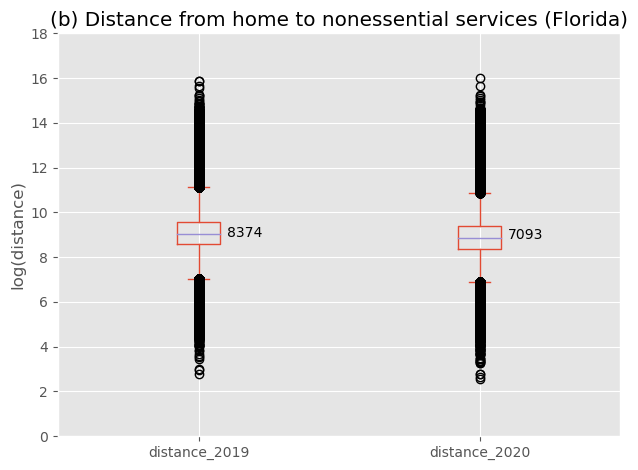

8374.0
7093.0


In [100]:
plt.figure(figsize=(12, 8), dpi=80)
ax = nes19_20[['distance_2019', 'distance_2020']].plot(kind='box', title='boxplot')

# Display the plot
plt.title('(b) Distance from home to nonessential services (Florida)')
ax.set_ylim(0,18)
plt.ylabel('log(distance)')
text(1.1, 8.9, '8374', fontsize=10)
text(2.1, 8.8, '7093', fontsize=10)
plt.tight_layout()

plt.savefig('FL_dist_ness.tiff', bbox_inches = 'tight', dpi=300)
plt.show()

print(FL_nonessential_2019['distance_from_home'].median())
print(FL_nonessential_2020['distance_from_home'].median())

<Figure size 960x640 with 0 Axes>

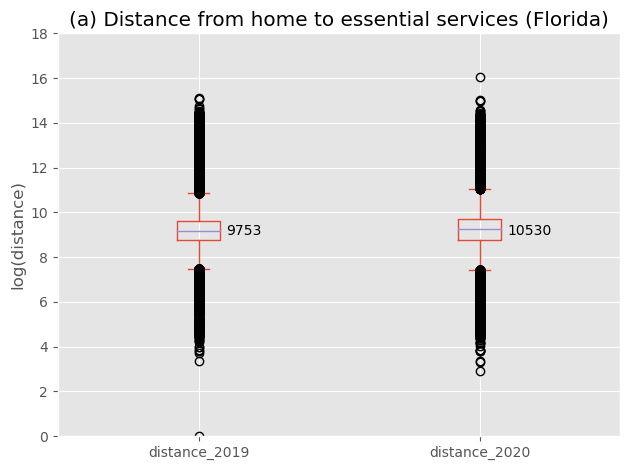

9753.0
10530.0


In [101]:
plt.figure(figsize=(12, 8), dpi=80)
ax = es19_20[['distance_2019', 'distance_2020']].plot(kind='box', title='boxplot')

plt.title('(a) Distance from home to essential services (Florida)')
ax.set_ylim(0,18)
plt.ylabel('log(distance)')
plt.tight_layout()
text(1.1, 9.0, '9753', fontsize=10)
text(2.1, 9.0, '10530', fontsize=10)
plt.savefig('FL_dist_ess.tiff', bbox_inches = 'tight', dpi=300)
plt.show()

print(FL_essential_2019['distance_from_home'].median())
print(FL_essential_2020['distance_from_home'].median())

In [45]:
FL_nonessential_2019
FL_nonessential_2020

,Unnamed: 0,placekey,location_name,top_category,sub_category,latitude,longitude,region,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,distance_from_home
10,309,222-227@8fy-8gk-9fz,Plaza Del Sol,Lessors of Real Estate,Malls,28.307133,-81.443127,FL,2020-03-16T00:00:00-04:00,2020-03-23T00:00:00-04:00,646.0,380.0,"[135,125,121,103,75,49,38]",10588.0
21,815,222-222@8dg-kr2-5pv,Dunkin',Restaurants and Other Eating Places,Snack and Nonalcoholic Beverage Bars,26.613593,-81.796897,FL,2020-03-16T00:00:00-04:00,2020-03-23T00:00:00-04:00,129.0,103.0,"[19,14,23,18,19,17,19]",13887.0
41,1216,223-223@8fz-s7k-68v,Greens Health Mart Pharmacy,Health and Personal Care Stores,Pharmacies and Drug Stores,26.720393,-80.037688,FL,2020-03-16T00:00:00-04:00,2020-03-23T00:00:00-04:00,7.0,6.0,"[0,0,2,2,3,0,0]",7246.0
44,1373,zzw-226@8fy-fwg-zxq,Save-A-Lot,Grocery Stores,Supermarkets and Other Grocery (except Conveni...,28.246704,-81.279841,FL,2020-03-16T00:00:00-04:00,2020-03-23T00:00:00-04:00,88.0,74.0,"[10,10,12,19,16,7,14]",3738.0
68,2299,zzw-223@8dk-mtj-649,Saks Off Fifth,Department Stores,Department Stores,27.532930,-82.506334,FL,2020-03-16T00:00:00-04:00,2020-03-23T00:00:00-04:00,20.0,20.0,"[11,7,2,0,0,0,0]",23366.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384644,12890682,222-222@8fw-2td-t5f,Public Storage,Lessors of Real Estate,Lessors of Miniwarehouses and Self-Storage Units,26.275626,-80.112445,FL,2020-04-27T00:00:00-04:00,2020-05-04T00:00:00-04:00,14.0,11.0,"[2,1,3,4,2,1,1]",6602.0
384649,12890881,zzw-223@8dj-h66-6c5,Gelati Joes,Restaurants and Other Eating Places,Snack and Nonalcoholic Beverage Bars,27.999800,-81.957480,FL,2020-04-27T00:00:00-04:00,2020-05-04T00:00:00-04:00,18.0,17.0,"[2,4,3,2,2,2,3]",3777.0
384653,12891009,226-222@8dj-h5y-9mk,Baskin Robbins,Restaurants and Other Eating Places,Snack and Nonalcoholic Beverage Bars,28.018247,-81.956901,FL,2020-04-27T00:00:00-04:00,2020-05-04T00:00:00-04:00,18.0,12.0,"[3,2,4,1,3,2,3]",9453.0
384654,12891049,223-223@8fz-pk5-cyv,Latitudes Tiki Bar and Grille,Restaurants and Other Eating Places,Full-Service Restaurants,27.265185,-80.201281,FL,2020-04-27T00:00:00-04:00,2020-05-04T00:00:00-04:00,38.0,26.0,"[4,1,4,2,8,12,7]",50070.0
